In [1]:
library(tidyverse)
library(gtsummary)
library(flextable)
library(gt)
library(rvest)
library(RColorBrewer)
library(viridis)
library(ggrepel)

options(repr.plot.width=12, repr.plot.height=7) #changing size of figures

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘flextable’


The following object is masked from ‘package:gtsummary’:

    as_flextable


The following object is masked from ‘package:purrr’:

    compose


Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:gt’:

    html


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding


Loading required package: viridisLite



# Introduction
In this assignment, you practice some basic R programming skills you will need to incorporate in your data analyses in future assignments.  Focus will be put on data management and wrangling, data visualization and exploration, tabulation, and regression.

You will analyze some National Basketball Association (NBA) data both at the team level and player level, with player data examined during the 1999-2000, 2009-2010, and 2019-2020 seasons.  You will attempt to replicate analytic output in both numeric results and formatting, to establish formatting expectations for the rest of the course.  All data wrangling (i.e. data editing) should be done using the `tidyerse` functions whenever possible.  All plotting should be done using `ggplot2` with `theme_bw()` applied (see below).

# Data Management
## 1.
Load the following datasets into R from the `data` folder:

- nba_teams_19_20.csv
- nba_players_99_00.csv
- nba_players_09_10.csv
- nba_players_19_20.csv

and save each as a separate object in R.  For the player datasets, filter out players with less then 1000 minutes played (`MP`)

In [2]:
#setting working directory
setwd('/Users/alexis/Documents/BIOS 635/Assignment 1/data')

#reading in data
nba_teams = read_csv('nba_teams_19_20.csv')
nba_players_9900 = read_csv('nba_players_99_00.csv') %>% #also filtering out players w/ < 1000 MP
  filter(as.integer(MP) > 1000)
nba_players_0910 = read_csv('nba_players_09_10.csv') %>%
  filter(MP > 1000)
nba_players_1920 = read_csv('nba_players_19_20.csv') %>%
  filter(MP > 1000)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Team = col_character(),
  Arena = col_character()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“Missing column names filled in: 'X20' [20], 'X25' [25]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Player = col_character(),
  Pos = col_character(),
  Tm = col_character(),
  X20 = col_logical(),
  X25 = col_logical()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“Missing column names filled in: 'X20' [20], 'X25' [25]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Player = col_character(),
  Pos = col_character(),
  Tm = col_character(),
  X20 = col_logical(),
  X25 = col_logical()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“Missing column names filled 

## 2.
### a
For each of the three player datasets (nba_players_99_00, nba_players_09_10, nba_players_19_20), create a variable called `season` which equals string `1999-2000` for the 99_00 dataset, `2009-2010` for the 09_00 dataset, and `2019-2020`

In [3]:
nba_players_9900$Season = rep('1999-2000', times = length(nba_players_9900$Rk))
nba_players_0910$Season = rep('2009-2010', times = length(nba_players_0910$Rk))
nba_players_1920$Season = rep('2019-2020', times = length(nba_players_1920$Rk))

### b
Combine all of the three player datasets together into a single dataset after creating the `season` variable and verify the size of the combined dataset (rows by columns) is correct

In [4]:
player_datasets_all = rbind(nba_players_9900, nba_players_0910, nba_players_1920)
dim(player_datasets_all)

[1] 706  30

### c
In your combined player data, denoted `player_datasets_all`, remove all text in the `Player` variable from a "\\" onward (ex. Kevin Donovan\\kmdono changed to Kevin Donovan).  

**Hint:** One way is to use the `separate` function from `tidyverse` with `sep`="\\\\"

In [5]:
player_datasets_all = player_datasets_all %>% 
  separate(Player, c('Player', NA), sep = "\\\\") %>% #need '\\\\' to represent '\'
  separate(Player, c('Player', NA), sep = "\\*") # also removing extra text from players that made the playoffs
head(player_datasets_all)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 676 rows [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...].”


Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,⋯,OWS,DWS,WS,WS/48,X25,OBPM,DBPM,BPM,VORP,Season
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Tariq Abdul-Wahad,SG,25,TOT,61,1578,13.6,0.477,0.036,⋯,0.4,1.8,2.2,0.068,NA,-1.2,-0.1,-1.2,0.3,1999-2000
1,Tariq Abdul-Wahad,SG,25,ORL,46,1205,14.4,0.484,0.041,⋯,0.4,1.6,2.0,0.082,NA,-1.0,0.2,-0.8,0.4,1999-2000
2,Shareef Abdur-Rahim,SF,23,VAN,82,3223,20.2,0.547,0.075,⋯,6.2,2.6,8.8,0.132,NA,2.6,-0.4,2.2,3.4,1999-2000
4,Ray Allen,SG,24,MIL,82,3070,20.6,0.570,0.288,⋯,9.0,1.0,10.1,0.157,NA,4.7,-1.1,3.6,4.3,1999-2000
6,John Amaechi,C,29,ORL,80,1684,13.2,0.505,0.009,⋯,0.6,1.8,2.4,0.067,NA,-1.8,-0.8,-2.5,-0.2,1999-2000
7,Derek Anderson,SG,25,LAC,64,2201,16.9,0.542,0.207,⋯,3.1,0.3,3.3,0.073,NA,1.2,-1.2,-0.1,1.1,1999-2000


### d
For the teams data (nba_teams_19_20.csv), some teams have an "\*" in their name.  This symbol indicates that the team made the playoffs.  Create the variable named `playoffs` where `playoffs`= yes if the team made the playoffs and = no otherwise.  Then remove the "\*" from their name and remove the row indicating the league average statistics.

**Hint**: Use the `grepl` function with pattern = "\\*"

In [6]:
playoff_teams_TF = grepl("\\*", nba_teams$Team) #grepel gives T or F if the team that made the playoffs
nba_teams$Playoffs = ifelse(playoff_teams_TF == TRUE, 'yes','no') #makes a vector where TRUE becomes yes and FALSE becomes no and adding as a col to original df
nba_teams = nba_teams %>% separate(Team, c("Team", NA), sep = "\\*") #now removing everything after \\* for playoff players only
nba_teams = nba_teams[!nba_teams$Team == 'League Average',] #now removing the row indivating the league avg. stats.
head(nba_teams)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 15 rows [14, 15, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31].”


Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,⋯,ORB%,FT/FGA,def_eFG%,def_TOV%,DRB%,def_FT/FGA,Arena,Attend.,Attend./G,Playoffs
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,Milwaukee Bucks,29.2,56,17,57,16,10.08,-0.67,9.41,⋯,20.7,0.201,0.489,12.0,81.6,0.178,Fiserv Forum,549036,17711,yes
2,Los Angeles Clippers,27.4,49,23,50,22,6.44,0.21,6.66,⋯,23.5,0.233,0.506,12.2,77.6,0.206,STAPLES Center,610176,19068,yes
3,Los Angeles Lakers,29.5,52,19,48,23,5.79,0.49,6.28,⋯,24.5,0.201,0.515,14.1,78.8,0.205,STAPLES Center,588907,18997,yes
4,Toronto Raptors,26.6,53,19,50,22,6.24,-0.26,5.97,⋯,21.3,0.210,0.502,14.6,76.7,0.202,Scotiabank Arena,633456,19796,yes
5,Boston Celtics,25.3,48,24,50,22,6.31,-0.47,5.83,⋯,23.9,0.207,0.509,13.5,77.4,0.215,TD Garden,610864,19090,yes
6,Dallas Mavericks,26.1,43,32,49,26,4.95,-0.07,4.87,⋯,23.2,0.206,0.525,10.6,77.7,0.175,American Airlines Center,682096,20062,yes


# Data Exploration and Visualization
## 3.
### a
First, for the teams dataset print out a summary statistics table, grouped by the `playoffs` variable to see separate statistics for teams that did or didn't make the playoffs.  Using the `gtsummary` package.  Include statistics for the following variables in the following order:

- Wins `W`
- Losses `L`
- Average age (years) `Age`
- Strength of schedule (SOS) `SOS`
- Offensive Rating (ORtg) `ORtg`
- Defensive Rating (ORtg) `DRtg`
- Pace `Pace`
- True Shooting Percentage (TS) `TS%`
- 3 Point Shots Attempted Rate (3PAr) `3PAr`

Due to the small sample size, include the following statistics

- sample size per group **and** in total
- median and IQR (interquartile range)
- p-value for test of group differences in median using Wilcoxon rank sum test

In [7]:
nba_teams %>%
  group_by(Playoffs) %>%
  select(W, L, Age, SOS,  ORtg, DRtg, Pace, `TS%`, `3PAr`) %>%
  tbl_summary(by = Playoffs, missing = "no") %>%
  add_p() %>% #adding p value from wilcoxon rank sum
  add_overall() %>%
  bold_labels()

Adding missing grouping variables: `Playoffs`

Warning for variable 'W':
 simpleWarning in wilcox.test.default(x = c(34, 30, 32, 34, 31, 22, 19, 20, 25, : cannot compute exact p-value with ties

Warning for variable 'L':
 simpleWarning in wilcox.test.default(x = c(39, 42, 39, 39, 41, 43, 45, 46, 47, : cannot compute exact p-value with ties

Warning for variable 'Age':
 simpleWarning in wilcox.test.default(x = c(24.6, 25.4, 27.6, 24.1, 27, 24.4, 24.8, : cannot compute exact p-value with ties

Warning for variable 'SOS':
 simpleWarning in wilcox.test.default(x = c(0.35, 0.74, 0.46, 0.16, 0.46, -0.93, : cannot compute exact p-value with ties

Warning for variable 'ORtg':
 simpleWarning in wilcox.test.default(x = c(111.7, 110.7, 112.4, 109.2, 110.2, : cannot compute exact p-value with ties

Warning for variable 'DRtg':
 simpleWarning in wilcox.test.default(x = c(111.4, 111.9, 113.5, 110.3, 112.2, : cannot compute exact p-value with ties

Warning for variable 'Pace':
 simpleWarning in wilco

<style>html {
  font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, Oxygen, Ubuntu, Cantarell, 'Helvetica Neue', 'Fira Sans', 'Droid Sans', Arial, sans-serif;
}

#bpmqtlkuzq .gt_table {
  display: table;
  border-collapse: collapse;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#bpmqtlkuzq .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-widt

### b
An age-long debate in basketball is the importance in a team's offense vs their defense when it comes to winning.  To examine this, do the following using `ggplot2`

- Create a scatterplot of ORtg by DRtg for the teams
- Color the points based the amount of wins for the team
- Change the shape of the points based on if the team made the playoffs or not
- Create two intersecting lines: one with an intercept at the mean ORtg and one with an intercept at the mean DRtg
- Adding line of best fit using `geom_smooth` without any standard error bars and make line red
- Add `theme_bw`
- Change all labels (x, y, color, shape) to be legible

`geom_smooth()` using formula 'y ~ x'



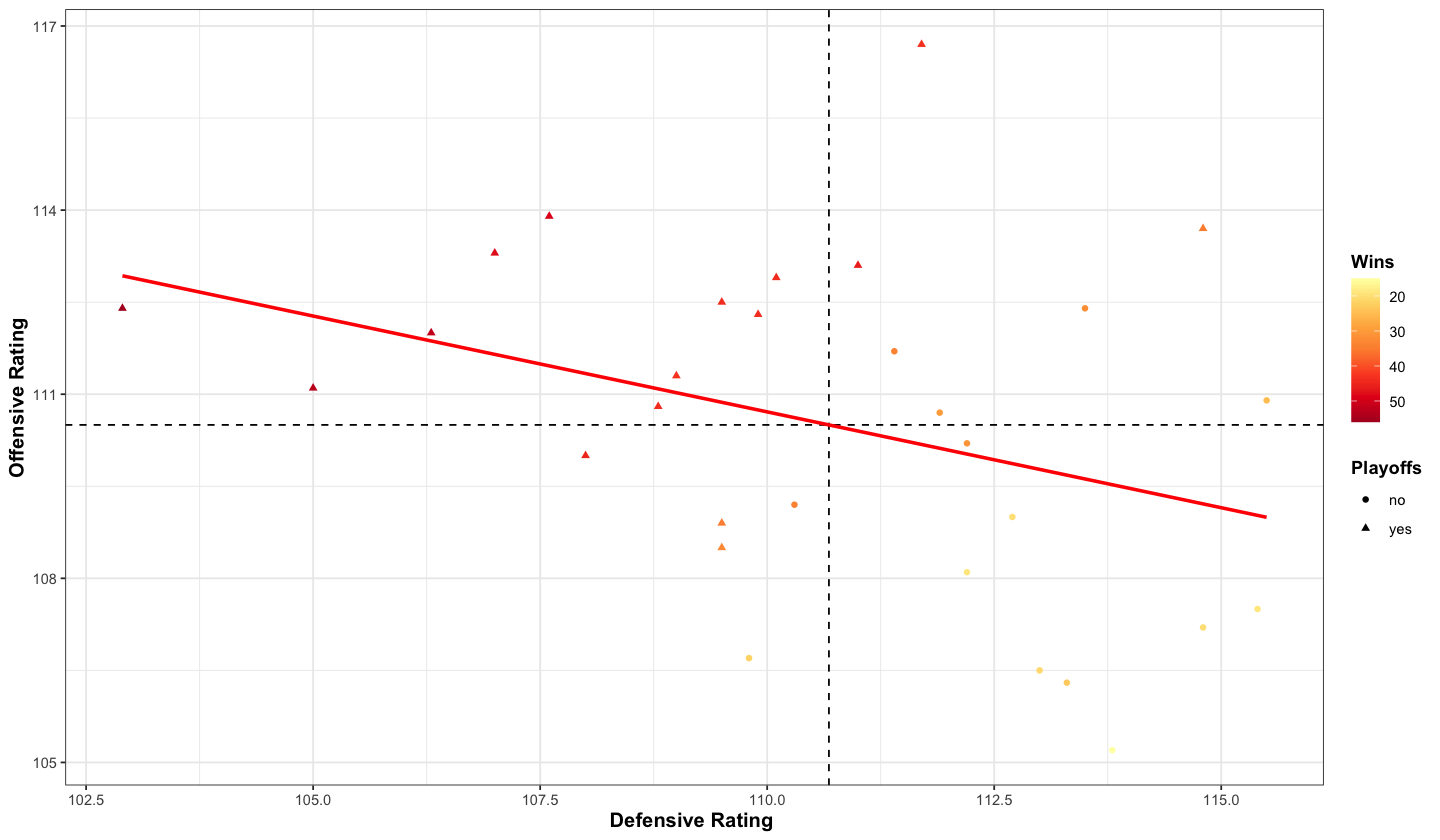

In [8]:
ggplot(data = nba_teams, aes(x = DRtg, y = ORtg)) + 
  geom_point(aes(color = W, shape = Playoffs)) + 
  geom_hline(yintercept = mean(nba_teams$ORtg), linetype = "dashed") + 
  geom_vline(xintercept = mean(nba_teams$DRtg), linetype = "dashed") +
  geom_smooth(method = 'lm', se = FALSE, color = 'red') + 
  
  theme_bw() + 
  theme(axis.title = element_text(face = "bold", size = rel(1.1)), #changes axis titles
        legend.title = element_text(face="bold", size = 11)) + 
  xlab("Defensive Rating ") + 
  ylab("Offensive Rating") + 
  scale_color_distiller(palette = "YlOrRd", trans = "reverse", "Wins") #reversing direction of color scale and changing legend name

### c
Let's look at the player data now to do some more in-depth analyses.  Recall we have three seasons of player data to look at (denoted in the combined dataset by variable `seasons`): 1999-2000, 2009-2010, 2019-2020.  First, Let's see if we can find players are great "two-way players", i.e. those that are great at offense and defense.  We will use the Offensive and Defensive Box Plus Minus variable (`OBPM` and `DBPM`) to do this.  First, let's complete the following plot:

- Scatterplot of `OBPM` by `DBPM`
- Facet plot by `season` variable
- Color point by `PER`, a measure of overall player performance
- Adding line of best fit using `geom_smooth` without any standard error bars and make line red
- Add `theme_bw`
- Change all labels (x, y, color) to be legible

`geom_smooth()` using formula 'y ~ x'



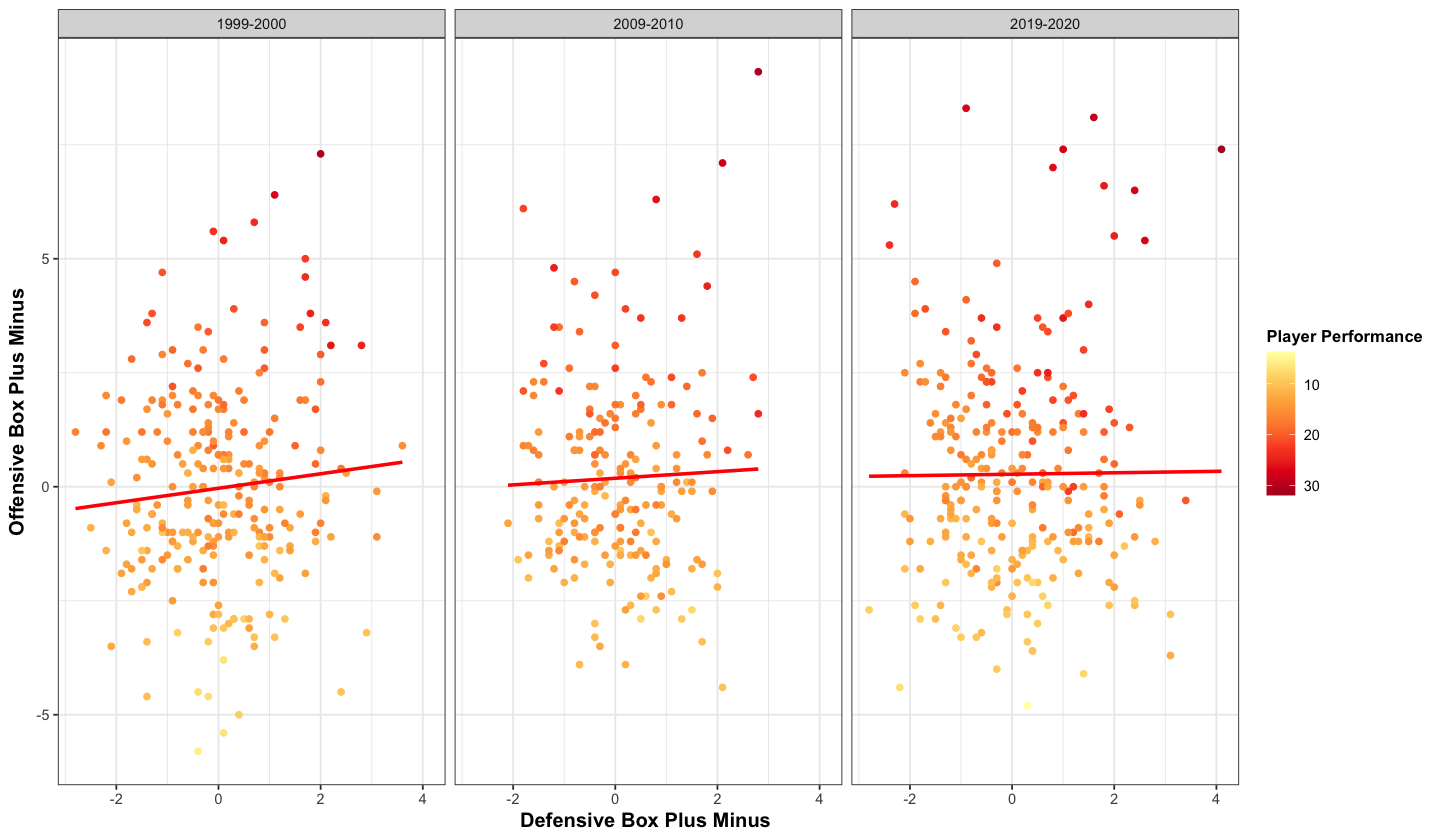

In [9]:
ggplot(data = player_datasets_all, aes(y = OBPM, x = DBPM)) + 
  geom_point(aes(color = PER)) + 
  geom_smooth(method = 'lm', se = FALSE, color = 'red') + 
  facet_wrap(~Season) + 
  
  theme_bw() + 
  theme(axis.title = element_text(face = "bold", size = rel(1.1)), #changes axis titles
        legend.title = element_text(face = "bold", size = 10)) + 
  xlab("Defensive Box Plus Minus ") + 
  ylab("Offensive Box Plus Minus") + 
  scale_color_distiller(palette = "YlOrRd", trans = "reverse", "Player Performance") #reversing direction of color scale and changing legend name

### d
Let's use `PER` to highlight a few players on this plot.  First, let's visualize the distribution of `PER` using a violin plot.  We will create separate plots by season and by position (`Pos`).

First, let's collapse position into the following three groups

- Guard (`Pos` equals PG, SG, or PG-SG)
- Forward (`Pos` equals SF, SF-SG, or SF-PF)
- Big (`Pos` equals PF, C, PF-C, C-PF, or PF-SF)
- NA (otherwise, denotes missing, not same as the string "NA")

Remove those with missing group from the plot

- Have position group on the x-axis, as well as fill
- Have PER on the y-axis
- Facet by season
- Add `theme_bw`
- Change all labels (x, y, fill) to be legible

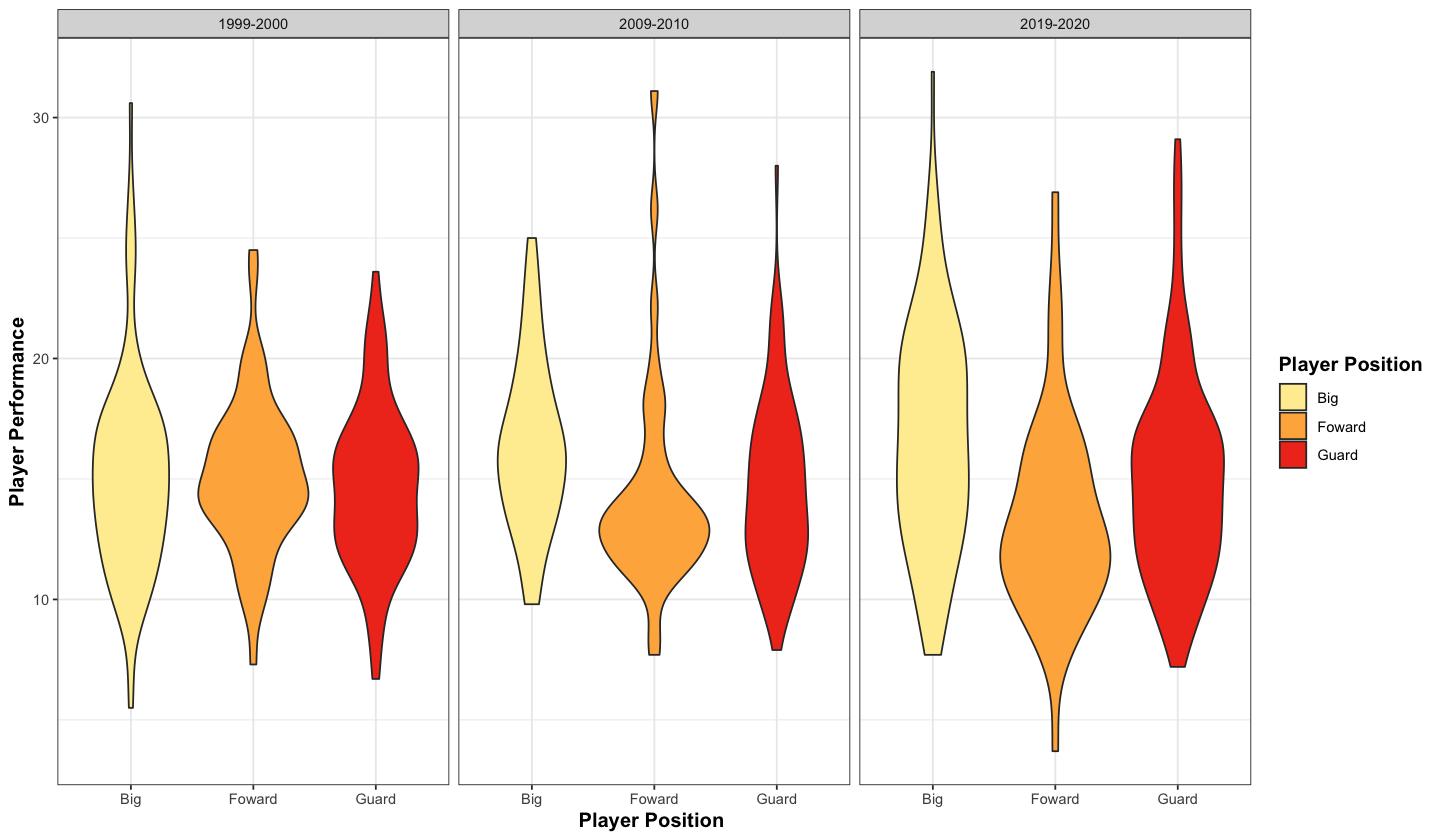

In [10]:
#collapsing positions into groups 
for (i in 1:length(player_datasets_all$Pos)){
  if (player_datasets_all$Pos[i] == 'PG' | player_datasets_all$Pos[i] == 'SG' | player_datasets_all$Pos[i] == 'PG-SG'){
    player_datasets_all$Pos[i] = 'Guard' #changing to guard
  } else if (player_datasets_all$Pos[i] == 'SF' | player_datasets_all$Pos[i] == 'SF-SG' | player_datasets_all$Pos[i] == 'SF-PF'){
    player_datasets_all$Pos[i] = 'Foward' #changing to forward
  } else if (player_datasets_all$Pos[i] == 'PF' | player_datasets_all$Pos[i] == 'C' | player_datasets_all$Pos[i] == 'PF-C'| player_datasets_all$Pos[i] == 'C-PF' | player_datasets_all$Pos[i] == 'PF-SF'){
    player_datasets_all$Pos[i] = 'Big' #changing to big
  } else{
    player_datasets_all$Pos[i] = NA
  }
}

player_datasets_all = player_datasets_all %>% drop_na(Pos) #removing rows with NAs

ggplot(data = player_datasets_all, aes(x = Pos, y = PER, fill = Pos)) + 
  geom_violin() + 
  facet_wrap(~Season) + 
  
  theme_bw() + 
  theme(axis.title = element_text(face = "bold", size = rel(1.1)), #changes axis titles
        legend.title = element_text(face="bold", size = 12)) + 
  xlab("Player Position ") + 
  ylab("Player Performance") + 
  scale_fill_brewer(palette = "YlOrRd", "Player Position") #changing legend name

### e
Based on this, let's look only at "elite" players by filtering our previous scatterplot to only include PER > 20.  Let's also again filter out those with position group equal to `NA`.  Let's also add text to the plot next to the points which provide the name of that player for those with PER>=25.

Specifically:

- First, create a dataset containing only players with non-missing postion group and PER >= 25, only keeping `Player`, `OBPM`, `DBPM`, `PER`, and `season`
- Create scatterplot with `OBPM` on the x axis and `DBPM` on the y axis, with points colored by `PER`
- Only include players with non-missing position group and `PER`>20 in this plot
- Facet by `season`
- Using the `geom_text` with `label=Player` and `size=4`, add player names to appropriate points using dataset created in first bullet
- Change x limits to between 0 and 12
- Make x and y axis labels legible
- Add `theme_bw`

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <8d>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <87>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <8d>”
Warning message in grid.Call

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <87>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <8d>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <87>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Luka Dončić' in 'mbcsToSbcs': dot substituted for <c4>”
Warning message in grid.Call

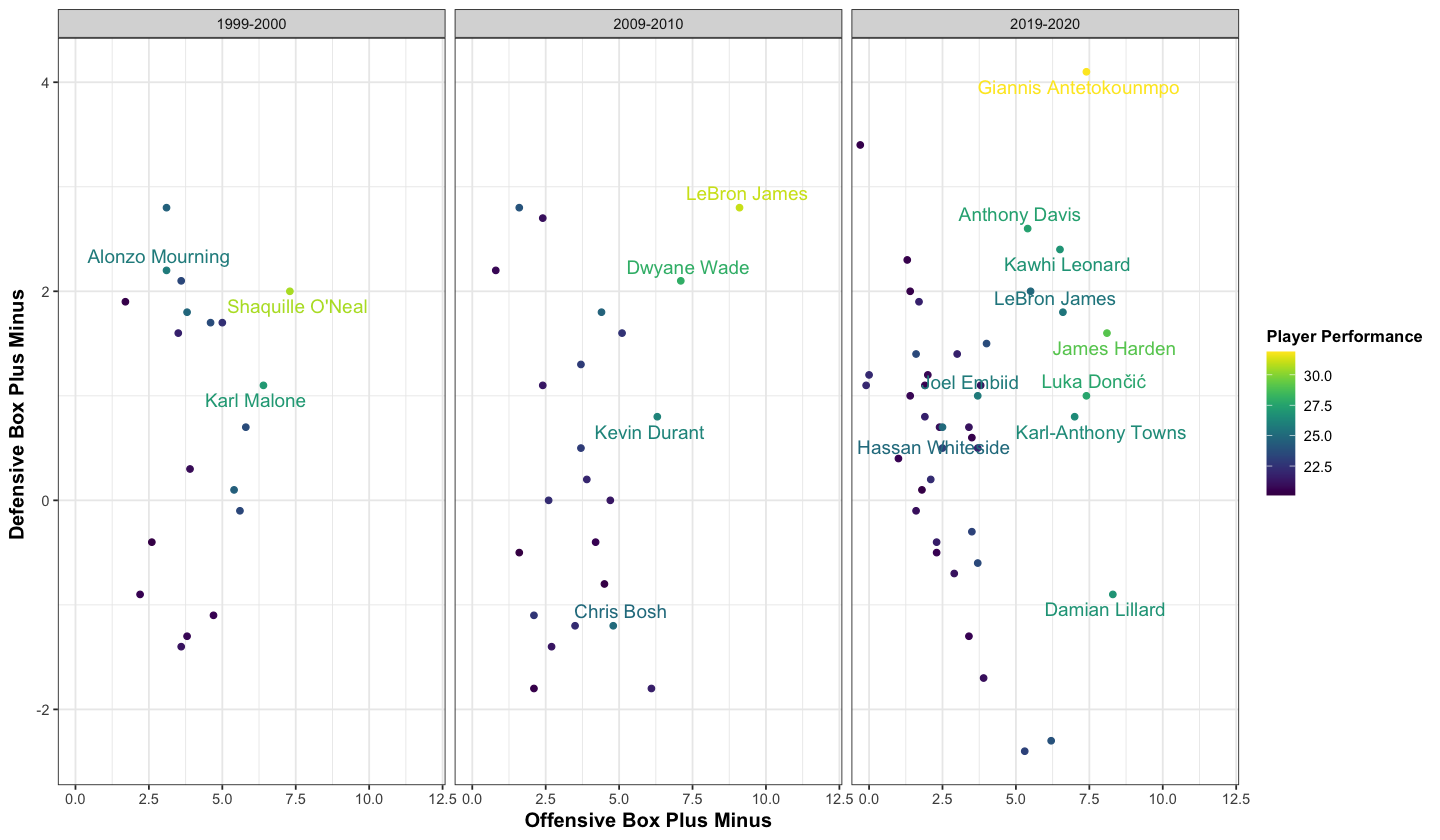

In [11]:
elite_players = player_datasets_all %>%
  filter(PER > 20) %>%
  select(Player, OBPM, DBPM, PER, Season)

ggplot() + 
  geom_point(data = elite_players, aes(x = OBPM, y = DBPM, color = PER)) + 
  geom_text_repel(data = elite_players %>%
              filter(PER >= 25), aes(x = OBPM, y = DBPM, color = PER, label = Player), size = 4, segment.size = 0.3) + 
  coord_cartesian(xlim = c(0,12)) + 
  facet_wrap(~Season) + 
  theme_bw() + 
  theme(axis.title = element_text(face = "bold", size = rel(1.1)), #changes axis titles
        legend.title = element_text(face = "bold", size = 10)) + 
  ylab("Defensive Box Plus Minus ") + 
  xlab("Offensive Box Plus Minus") + 
  scale_color_viridis(name = "Player Performance") #changing legend title

### f
Finally, let's create a table showing the best offensive and defensive players in the league based on `OBPM`, `DBPM`, along with looking at how often that player touches the ball on offense using `USG%`.  Finally, we see how `PER` relates to all three of these.  You can create the table using either the `gt` package or `flextable` package (below show table for the `flextable` package).  To complete this, do the following

- First, take the players dataset with the added in position group variable and select the following variables: `Player`, `season`, position group, `OBPM`, `DBPM`, `USG%`, `PER`
- Then, filter out those with missing position group
- Then, only include those with `OBPM`>95th percentile of `OBPM` or  **or** `DBPM`>95th percentile of `DBPM`
- Then, arrange dataset by `season`in ascending order, and `OBPM` in descending order
- Finally create table using this edited dataset and your package of choice from above.  Make sure to include the following:
  - Rename any "messy" column names to be legible
  - Add colors to `PER` cells of table with **blue** on the low end of the gradient and **red** on the high end of the gradient, and **white** in the middle.  Use a scale of 8 to 32
  
**Hints**:

1. To compute the 0.95 percentile for say `OBPM` and filter using this, use

`quantile(player_dataset_edited$OBPM, p=0.95)`

where `player_dataset_edited` is the name of your dataset

for `DBPM` do the same by with `DBPM`.  Finally, use `filter` with `|` denoting **or** to filter data

2. For `gt` package, use `data_color` function with `colors=scales::col_numeric`


In [12]:
player_datasets_all %>%
  select(Player, Season, Pos, OBPM, DBPM, `USG%`, PER) %>%
  filter(OBPM > quantile(player_datasets_all$OBPM, probs = 0.95) | DBPM > quantile(player_datasets_all$DBPM, 
                                                                                   probs = 0.95)) %>%
  arrange(Season, desc(OBPM)) %>%
  
  #now making gt table
  gt() %>%
  tab_header(title = "Best Offensive & Defensive Players in the NBA", 
             subtitle = "1999-2000, 2009-2010, & 2019-2020 Seasons") %>%
  cols_label(Pos = "Position", OBPM = "Offensive Box Plus Minus", DBPM = "Defensive Box Plus Minus", 
             `USG%` = "Usage Percentage", PER = "Player Performance") %>%
  data_color(columns = vars(PER), colors = scales::col_numeric(palette = c("blue", "white", "red"), 
                                                               domain = range(8:32))) %>%
  gt::tab_style(
    style = list(
      cell_text(font = "Oswald", weight = "bold")), 
    locations = list(
      cells_title(groups = "title"), #changes title
      cells_column_labels(gt::everything()) # changes col names
      ))

Player,Season,Pos,OBPM,DBPM,USG%,PER
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Shaquille O'Neal,1999-2000,Big,7.3,2.0,31.2,30.6
Karl Malone,1999-2000,Big,6.4,1.1,31.9,27.1
Gary Payton,1999-2000,Guard,5.8,0.7,26.8,23.6
Vince Carter,1999-2000,Foward,5.6,-0.1,30.0,23.4
Grant Hill,1999-2000,Foward,5.4,0.1,30.5,24.5
John Stockton,1999-2000,Guard,5.0,1.7,19.3,22.4
Ray Allen,1999-2000,Guard,4.7,-1.1,25.6,20.6
Kevin Garnett,1999-2000,Big,4.6,1.7,27.4,23.6
Terrell Brandon,1999-2000,Guard,3.9,0.3,23.0,20.8
